## Example plotting following [ASP Docs Section 8.2](https://stereopipeline.readthedocs.io/en/latest/examples/hirise.html#mars-reconnaissance-orbiter-hirise) for Mars Reconnaissance Orbiter (MRO) HiRISE camera

Below are example `asp_plot` outputs following the processing in ASP Docs Mars HiRISE example [Section 8.2](https://stereopipeline.readthedocs.io/en/latest/examples/hirise.html#mars-reconnaissance-orbiter-hirise).

Retrieve `.IMG` files:

```bash
wget -r -l1 -np \
     "http://hirise-pds.lpl.arizona.edu/PDS/EDR/PSP/ORB_001500_001599/PSP_001513_1655/" \
     -A "*RED*IMG"

wget -r -l1 -np \
     "http://hirise-pds.lpl.arizona.edu/PDS/EDR/PSP/ORB_001700_001799/PSP_001777_1650/" \
     -A "*RED*IMG"
```

---

[Install ISIS](https://astrogeology.usgs.gov/docs/how-to-guides/environment-setup-and-maintenance/installing-isis-via-anaconda/#installing-isis) and pre-process the images for stereo:

```bash
ISIS> hiedr2mosaic.py PSP_001777_1650_RED*.IMG
ISIS> hiedr2mosaic.py PSP_001513_1655_RED*.IMG
ISIS> cam2map4stereo.py PSP_001777_1650_RED.mos_hijitreged.norm.cub \
                        PSP_001513_1655_RED.mos_hijitreged.norm.cub
```

---

Run stereo processing and point2dem:

```bash
parallel_stereo PSP_001513_1655_RED.map.cub \
                PSP_001777_1650_RED.map.cub \
                result/output

point2dem -r mars --stereographic \
          --auto-proj-center      \
          --errorimage \
          result/output-PC.tif
```

## DISCLAIMER

The output from this processing is particularly large and difficult to work with. The `asp_plot` commands currently struggle with full HiRISE DEMs.

Here is screenshot of the DEM and hillshade output by the commands above using the ASP tool `stereo_gui` to display them:

```bash
stereo_gui result/output-DEM.tif
```

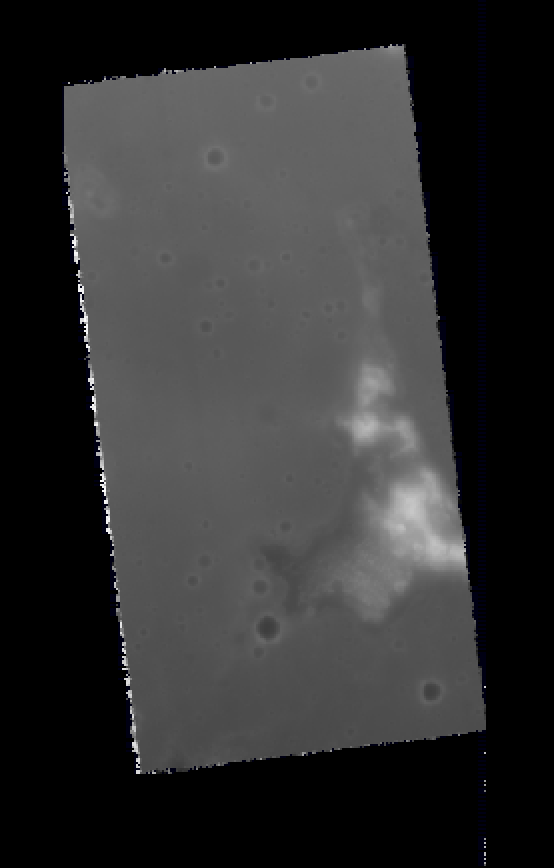

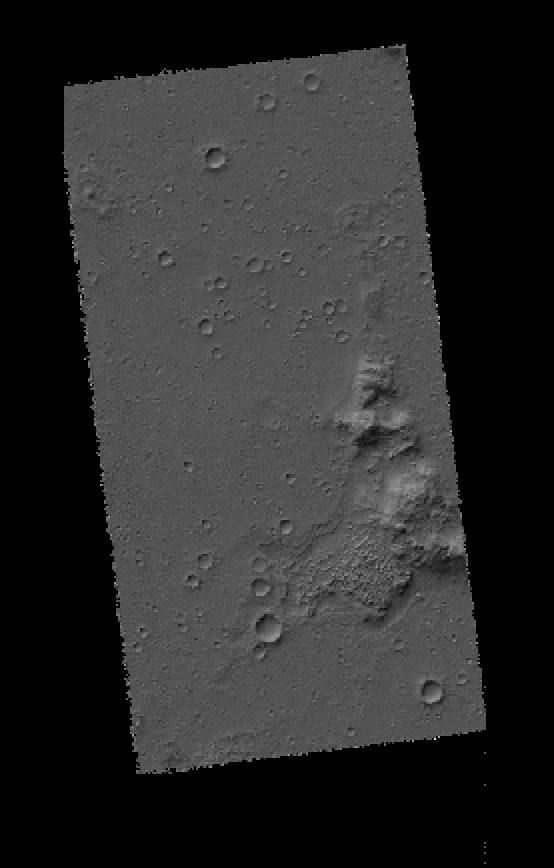



## Full report

Example command for full stereo-processing report

In [ ]:
directory = "/Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_2_mars_hirise/"
stereo_directory = "result/"

In [ ]:
!asp_plot \
  --directory $directory \
  --stereo_directory $stereo_directory \
  --add_basemap False \
  --plot_icesat False \
  --plot_geometry False

## Individual plots

Example modular usage of `asp_plot` for this example processing.

### Processing Parameters

In [2]:
%load_ext autoreload
%autoreload 2

from asp_plot.processing_parameters import ProcessingParameters

In [3]:
processing_parameters = ProcessingParameters(
    processing_directory=directory,
    stereo_directory=stereo_directory
)
processing_parameters_dict = processing_parameters.from_log_files()

print(f"Processed on: {processing_parameters_dict['processing_timestamp']}\n")

print(f"Reference DEM: {processing_parameters_dict['reference_dem']}\n")

print(f"Bundle adjustment ({processing_parameters_dict['bundle_adjust_run_time']}):\n")
print(processing_parameters_dict["bundle_adjust"])

print(f"\nStereo ({processing_parameters_dict['stereo_run_time']}):\n")
print(processing_parameters_dict["stereo"])

print(f"\nPoint2dem ({processing_parameters_dict['point2dem_run_time']}):\n")
print(processing_parameters_dict["point2dem"])

Processed on: 2025-11-04 15:47:19

Reference DEM: 

Bundle adjustment (N/A):

Bundle adjustment not run

Stereo (1 hours and 2 minutes):

stereo --corr-seed-mode 1 --compute-point-cloud-center-only --threads 20 PSP_001513_1655_RED.map.cub PSP_001777_1650_RED.map.cub result/output

Point2dem (1 hours and 49 minutes):

point2dem -r mars --stereographic --auto-proj-center --errorimage result/output-PC.tif result/output-PC.tif


### Scene Plots

In [4]:
from asp_plot.scenes import ScenePlotter

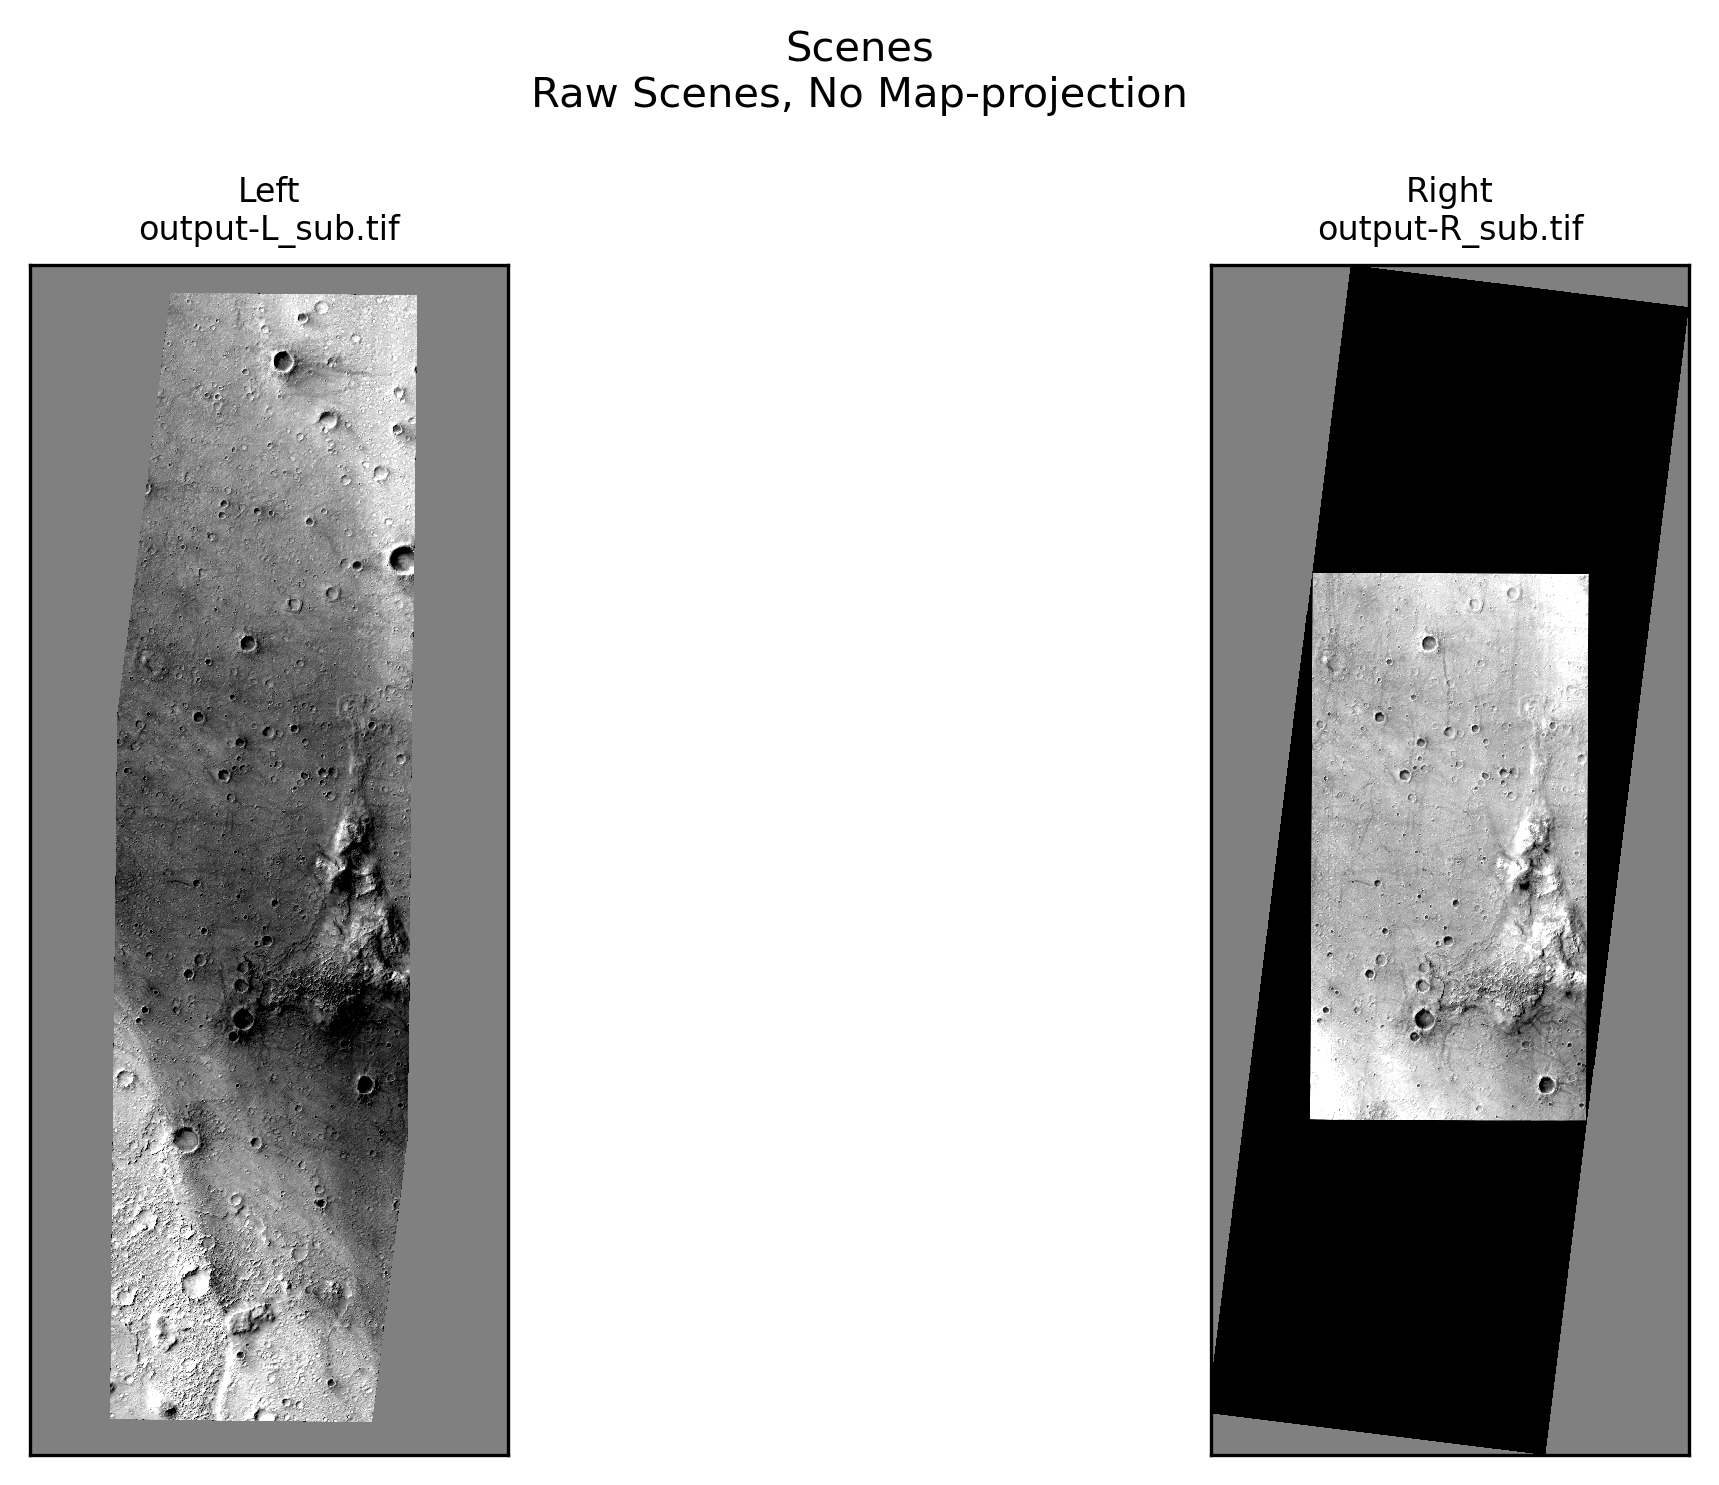

In [5]:
plotter = ScenePlotter(
  directory,
  stereo_directory,
  title="Scenes"
)

plotter.plot_scenes()

### Stereo Plots

In [6]:
from asp_plot.stereo import StereoPlotter

In [7]:
plotter = StereoPlotter(
  directory, 
  stereo_directory
)


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.





ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_8_2_mars_hirise_SEE_PFE/result/output-DEM.tif



In [ ]:
plotter.title = "Hillshade"

plotter.plot_detailed_hillshade()

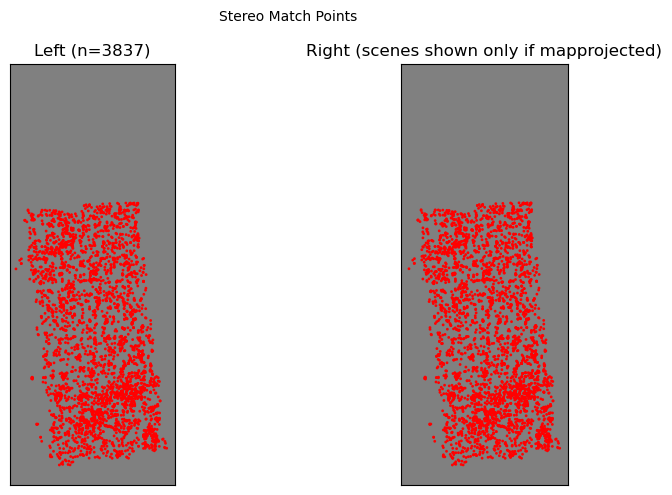

In [8]:
plotter.title="Stereo Match Points"

plotter.plot_match_points()

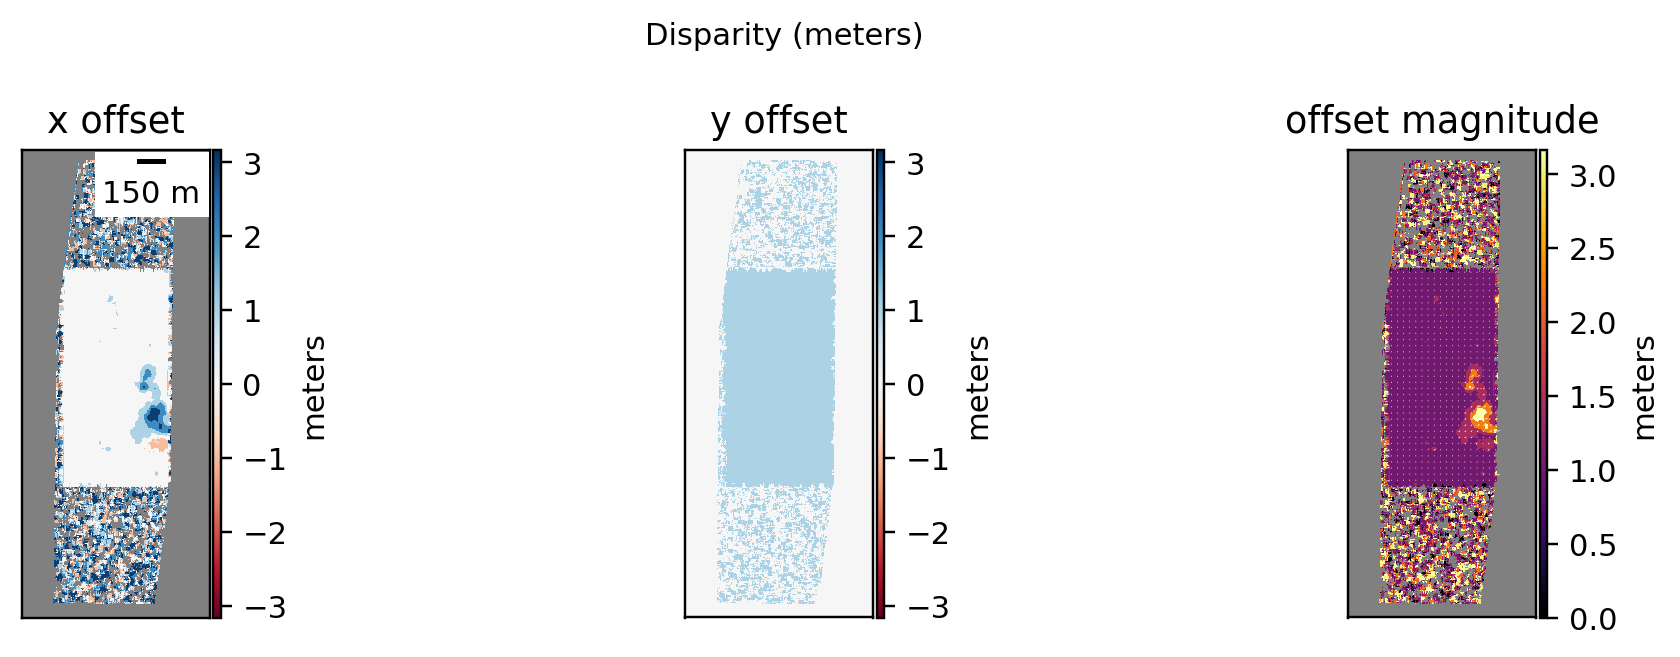

In [9]:
plotter.title = "Disparity (meters)"

plotter.plot_disparity(
  unit="meters",
  quiver=True,
)

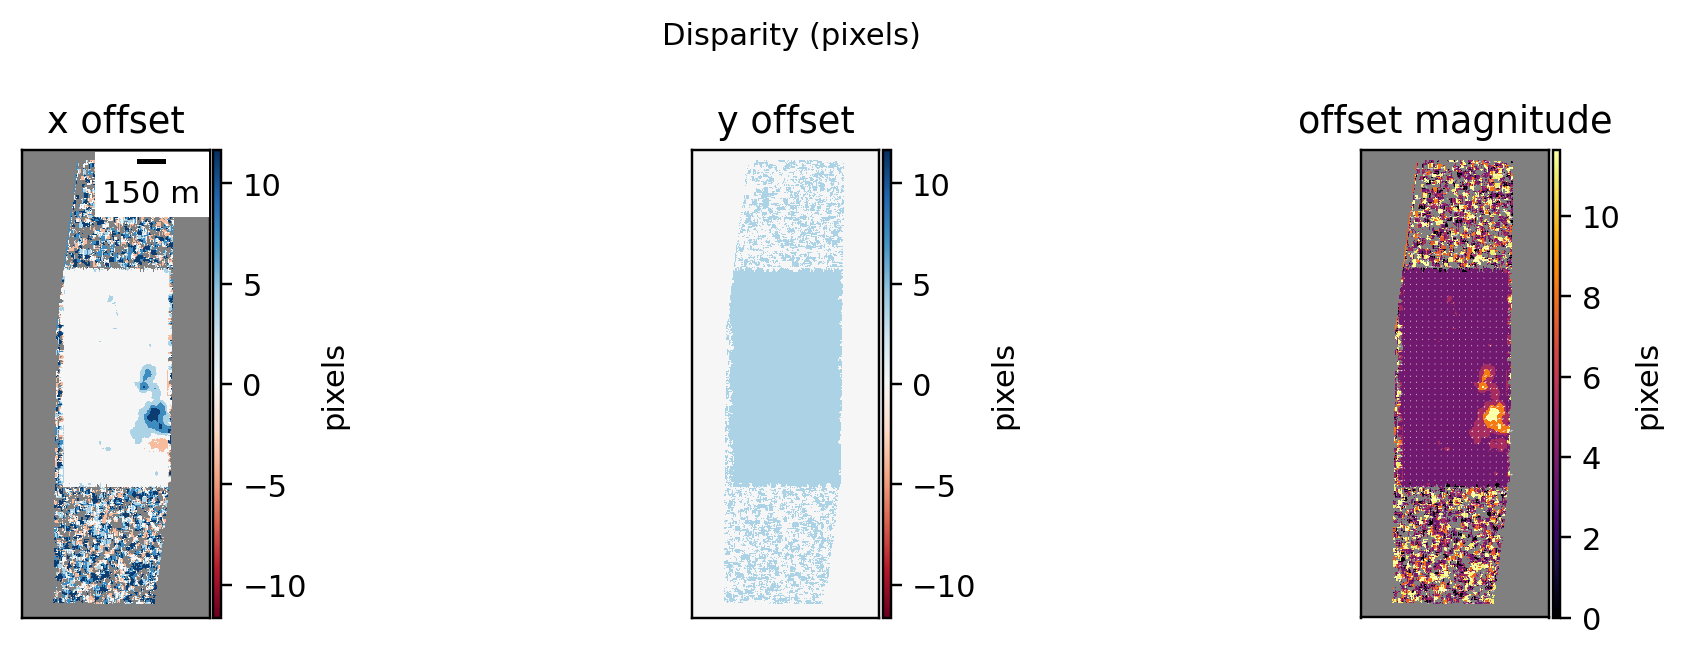

In [10]:
plotter.title = "Disparity (pixels)"

plotter.plot_disparity(
  unit="pixels",
  quiver=True,
)

In [11]:
plotter.title = "Stereo DEM Results"

plotter.plot_dem_results()

Plotting DEM results. This can take a minute for large inputs.


/Users/ben/miniforge3/envs/asp_plot/lib/python3.13/site-packages/osgeo/gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


: 